## Ainsley Works on Problem Sets

Ainsley sits down on Sunday night to finish S problem sets, where S is a random variable that is equally likely to be 1, 2, 3, or 4. She learns C concepts from the problem sets and drinks D energy drinks to stay awake, where C and D are random and depend on how many problem sets she does. You know that $p_{C|S}(c|s) = 1/(2s+1)$ for $c \in \{ 0,1,\ldots ,2s\}.$ For each problem set she completes, regardless of concepts learned, she independently decides to have an energy drink with probability $q.$ That is, the number of energy drinks she has is binomial with parameters $q$ and $S:$

$$\begin{eqnarray}
    p_{D\mid S}(d\mid s) &= \begin{cases} {s \choose d}\, q^d\, (1-q)^{s-d} & d \in \{0,\ldots,s\} \\
            0 & \text{otherwise} \end{cases}
\end{eqnarray}$$

where ${n \choose k} = \frac{n!}{k!\, (n-k)!}.$

**Question:** Does the conditional entropy $H(C\mid S=s)$ decrease, stay the same, or increase as $s$ increases from $1$ to $4?$


[$\times    $] It decreases.    <br>
[$\times    $] It stays the same<br>
[$\checkmark$] It increases.

**Solution:** Conditioned on $S=s, C$ is uniform from $0$ to $2s.$

$$\begin{align} H(C|S=s)&= \sum _{c=0}^{2s} p_{C|S}(c|s) \log \frac{1}{p_{C|S}(c|s)}\\	 	 
&= \sum _{c=0}^{2s} \frac{1}{2s+1} \log \frac{1}{\frac{1}{2s+1}}\\	 	 
&=  \log \frac{1}{\frac{1}{2s+1}}\\	 	 
&=  \log (2s+1)	 	 
\end{align}$$

As $s$ increases, so does $\log (2s+1).$

We can also see this intuitively: as $s$ increases, $c$ is uniform over a broader range of possibilities, which implies a higher entropy.

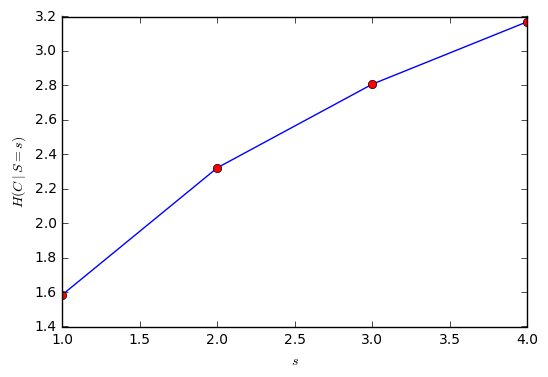

In [1]:
%matplotlib inline
from numpy import log2, arange
import matplotlib.pyplot as plt

f = lambda x: - x * log2(x)
g = lambda s: (2*s + 1) * f(1/(2*s+1))

s = arange(1, 5, 1)
plt.plot(s, g(s), '-', s, g(s), 'ro')
plt.xlabel("$s$")
plt.ylabel("$H(C\mid S=s)$")
plt.show()

**Question:** The next morning, her roommate notices that Ainsley drank $d$ energy drinks. What is the expected number of concepts that she learned?

You should derive a general expression for this although in the answer boxes below we only ask you to evaluate the expression for specific choices of $d$ and $q.$ If you're general expression is correct, your answers to these should also be correct.

(Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

1. When $q=0.2, \mathbb {E}[C | D = 1] =$ {{ans1}}
2. When $q=0.5, \mathbb {E}[C | D = 2] =$ {{ans2}}
3. When $q=0.7, \mathbb {E}[C | D = 3] =$ {{ans3}}

**Solution:** We are interested in $\mathbb {E}[C|D=d].$ Since we are given information about $C$ conditioned on $S,$ we will condition on $S$ and use total expectation. We will also use the fact that $C$ and $D$ are conditionally independent given $S:$

$$\begin{align}
\mathbb {E}[C|D=d] &= \sum _{s=1}^4 \mathbb {E}[C|D=d, S=s] \mathbb {P}(S=s | D=d)\\ 	 
\text {(by conditional independence)}	&= \sum _{s=1}^4 \mathbb {E}[C|S=s] p_{S|D}(s|d)\\	 	 
\text {(by Bayes' rule)} &= \sum _{s=1}^4 \mathbb {E}[C|S=s] \frac{p_{D|S}(d|s) p_ S(s)}{p_ D(d)}\\	 	 
&= \frac{\sum _{s=1}^4 \left(\sum _{c=0}^{2s} c \frac{1}{2s+1}\right) p_{D|S}(d|s) p_ S(s)}{\sum _{s=1}^4 p_{D|S}(d|s) p_ S(s)}	\\ 	 
&=\frac{\sum _{s=1}^4 s \cdot p_{D|S}(d|s) }{\sum _{s=1}^4 p_{D|S}(d|s)}\\	 	 
\text {(since $p_{D|S}(d|s) = 0$ for $s < d$)}&= \frac{\sum _{s=d}^4 s \cdot p_{D|S}(d|s) }{\sum _{s=d}^4 p_{D|S}(d|s)}	\\ 	 
&=\frac{\sum _{s=d}^4 s {s \choose d} q^ d (1-q)^{s-d}}{\sum _{s=d}^4 {s \choose d} q^ d (1-q)^{s-d}}
\end{align}$$
Another solution that works is to compute $p_{C|D}(\cdot \mid d)$ and compute the expectation with respect to this distribution. This leads to a very similar set of steps as above.

In [2]:
from scipy.misc import comb
f = lambda s, d, q : comb(s, d) * (q ** d) * ((1 - q) ** (s - d))
ED = lambda d, q : sum([s * f(s, d, q) for s in range(d, 5)]) / \
                   sum([f(s, d, q) for s in range(d, 5)])

ans1 = "{0:.3f}".format(ED(1, 0.2))
ans2 = "{0:.3f}".format(ED(2, 0.5))
ans3 = "{0:.3f}".format(ED(3, 0.7))

**Question:** Is the mutual information $I(C ; D)$ greater than, less than, or equal to zero? You should assume that $q$ lies in the range $0 < q < 1.$


[$\checkmark$] Greater than 0<br>
[$\times    $] Less than 0   <br>
[$\times    $] Equal to 0    

**Solution:** $\boxed {\text {Greater than zero}}.$

Since the conditional expectation in the previous part depends on $d,$ we can infer that they are not independent. We can also justify this intuitively: for example, knowing that $D=4$ guarantees that $S=4,$ and therefore changes our belief about $C$ (i.e., $C$ is more likely to take on higher values).

## Consecutive Sixes

**Question:** On average, how many times do you have to roll a fair six-sided die before getting two consecutive sixes?

Hint: Use total expectation.

**Solution:** Let $\mu = \mathbb {E}[\# \text { rolls until we get two consecutive 6's}].$

The problem can be broken up into two events (that forms a partition of the sample space):

- Event 1: The very first time we roll a 6, the roll right afterward is also a 6.

    The probability of this first event is $1/6.$ You can think of it as we will, with probability $1,$ roll a 6 in a finite amount of time, and then it's just the next roll that we are looking at the probability for, and rolling a 6 in this next roll happens with probability $1/6.$ (Note that the probability that we never see a 6 is $\lim _{n \rightarrow \infty } (5/6)^ n = 0.$)

    Conditioned on this first event, let's compute the expected number of rolls until we get two consecutive 6's: The expected number of rolls until the first 6 is the expectation of a $\text {Geo}(1/6)$ random variable, which is $1/(1/6) = 6.$ The event we are conditioning on says that the next roll is a 6, so there the conditional expectation here is just $6 + 1 = 7$ rolls.

- Event 2: The very first time we roll a 6, the roll right afterward is not a 6.

    The probability for this second event is $5/6,$ i.e., the roll right after getting the first 6 is not a 6.

    Conditioned on this second event, let's compute the expected number of rolls until we get two consecutive 6's: The expected number of rolls until the first 6 is 6 rolls (again, this is the expectation of a $\text {Geo}(1/6)$ random variable), and then the 7th roll is not a 6. And then we restart the whole process over. So the conditional expectation for this case is $7 + \mu.$

Now using the law of total expectation,

$$\begin{align}
\mu	&= 7 \cdot \frac16 + (7 + \mu ) \frac56 \\	 	 
&= \frac76 + \frac{35}6 + \frac{5}{6}\mu\\ 	 
&= \frac{42}6 + \frac{5}{6}\mu ,
\end{align}$$

so

$$\frac16 \mu = \frac{42}6,\qquad {\text {i.e.,}}\qquad \mu = \boxed {42}.$$